# LOAD MODEL

# BLIP-2

In [ ]:
!pip install torch torchvision transformers
!pip install accelerate


In [ ]:
from transformers import Blip2Processor, Blip2ForConditionalGeneration
import torch
from PIL import Image

# Kiểm tra thiết bị (GPU hoặc CPU)
device = "cuda" if torch.cuda.is_available() else "cpu"

# Load mô hình BLIP-2 từ Hugging Face
processor = Blip2Processor.from_pretrained("Salesforce/blip2-opt-2.7b")
model = Blip2ForConditionalGeneration.from_pretrained("Salesforce/blip2-opt-2.7b").to(device)


preprocessor_config.json:   0%|          | 0.00/432 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/882 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/3.56M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/23.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/548 [00:00<?, ?B/s]

processor_config.json:   0%|          | 0.00/68.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.03k [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/122k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/10.0G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/141 [00:00<?, ?B/s]

In [ ]:
from google.colab import files

uploaded = files.upload()


Saving COCO_train2014_000000001424.jpg to COCO_train2014_000000001424.jpg


In [ ]:
image_path = list(uploaded.keys())[0]

In [ ]:
# Load ảnh  [36, 191, 195, 370]

image = Image.open(image_path).convert("RGB")

# Prompt để mô hình tập trung vào người trong bounding box
bounding_box_info = "(x_min=36, y_min=191, x_max=195, y_max=370)"  # Cập nhật tọa độ bounding box
prompt = ("Focus only on the person inside the bounding box at coordinates "
          f"{bounding_box_info}. Describe their action, body posture, and facial expression. "
          "Also, provide context about what is happening in the image.")

# Tiền xử lý ảnh
inputs = processor(images=image, text=prompt, return_tensors="pt").to(device)

# Sinh caption
with torch.no_grad():
    generated_ids = model.generate(**inputs)
    caption = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]

print("Generated Caption:", caption)


Generated Caption: a man cutting a cake with a group of children



In [ ]:
prompt = "What is happening in this image?"
inputs = processor(images=image, text=prompt, return_tensors="pt").to(device)

with torch.no_grad():
    generated_ids = model.generate(**inputs)
    caption = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]

print("Generated Caption:", caption)


Generated Caption: What is happening in this image?



# BLIP

In [ ]:
import torch
from PIL import Image
from torchvision import transforms
from transformers import BlipProcessor, BlipForConditionalGeneration

# Khởi tạo processor và mô hình BLIP
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/287 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/506 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/990M [00:00<?, ?B/s]

In [ ]:
# Hàm tiền xử lý ảnh
def preprocess_image(image_path, image_size=384):
    transform = transforms.Compose([
        transforms.Resize((image_size, image_size)),  # Resize ảnh thành (384, 384)
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ])
    img = Image.open(image_path).convert("RGB")
    return transform(img).unsqueeze(0)  # Thêm batch dimension

In [ ]:
# Đường dẫn tới ảnh có bouding box
# image_path = '/content/drive/MyDrive/KLTN/Dataset/emotic_pre/ade20k/images/sun_aaaevafjexfriuyd_bbox.jpg'
# Đường dẫn tới ảnh không có bouding box
# image_path = '/content/drive/MyDrive/KLTN/Dataset/emotic/ade20k/images/sun_aaaevafjexfriuyd_bbox.jpg'
image_path = '/content/COCO_train2014_000000000368_bbox.jpg'
image_path = '/content/COCO_train2014_000000000368.jpg'

In [ ]:
def generate_caption_and_display(image_path):
    # Tiền xử lý hình ảnh
    img = Image.open(image_path).convert("RGB")
    inputs = processor(img, return_tensors="pt")

    # Tạo caption bằng mô hình BLIP
    caption = model.generate(**inputs)
    caption_text = processor.decode(caption[0], skip_special_tokens=True)

    # Hiển thị hình ảnh và caption
    plt.imshow(img)
    print(caption_text)
    plt.axis("off")
    plt.show()

    return caption_text

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1258: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


a group of kids playing soccer in a field


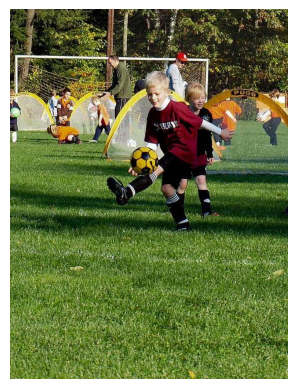

In [ ]:
import matplotlib.pyplot as plt
caption = generate_caption_and_display(image_path)

In [ ]:
inputs = processor(images=image, return_tensors="pt").to(device, torch.float16)

generated_ids = model.generate(**inputs)
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0].strip()
print(generated_text)

# ViT-gpt2

In [ ]:

from transformers import VisionEncoderDecoderModel, ViTImageProcessor, AutoTokenizer
import torch
from PIL import Image

model = VisionEncoderDecoderModel.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
feature_extractor = ViTImageProcessor.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
tokenizer = AutoTokenizer.from_pretrained("nlpconnect/vit-gpt2-image-captioning")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)



max_length = 16
num_beams = 4
gen_kwargs = {"max_length": max_length, "num_beams": num_beams}


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:104: UserWarning: 
Error while fetching `HF_TOKEN` secret value from your vault: 'Requesting secret HF_TOKEN timed out. Secrets can only be fetched when running from the Colab UI.'.
You are not authenticated with the Hugging Face Hub in this notebook.
If the error persists, please let us know by opening an issue on GitHub (https://github.com/huggingface/huggingface_hub/issues/new).
  warnings.warn(


config.json:   0%|          | 0.00/4.61k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/982M [00:00<?, ?B/s]

Config of the encoder: <class 'transformers.models.vit.modeling_vit.ViTModel'> is overwritten by shared encoder config: ViTConfig {
  "architectures": [
    "ViTModel"
  ],
  "attention_probs_dropout_prob": 0.0,
  "encoder_stride": 16,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 768,
  "image_size": 224,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "model_type": "vit",
  "num_attention_heads": 12,
  "num_channels": 3,
  "num_hidden_layers": 12,
  "patch_size": 16,
  "qkv_bias": true,
  "transformers_version": "4.46.3"
}

Config of the decoder: <class 'transformers.models.gpt2.modeling_gpt2.GPT2LMHeadModel'> is overwritten by shared decoder config: GPT2Config {
  "activation_function": "gelu_new",
  "add_cross_attention": true,
  "architectures": [
    "GPT2LMHeadModel"
  ],
  "attn_pdrop": 0.1,
  "bos_token_id": 50256,
  "decoder_start_token_id": 50256,
  "embd_pdrop": 0.1,
  "eos_token_id": 50256,
  "initializer_rang

preprocessor_config.json:   0%|          | 0.00/228 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/241 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/120 [00:00<?, ?B/s]

In [ ]:
import matplotlib.pyplot as plt

def predict_step_and_display(image_paths):
    images = []
    for image_path in image_paths:
        i_image = Image.open(image_path)
        if i_image.mode != "RGB":
            i_image = i_image.convert(mode="RGB")
        images.append(i_image)

    pixel_values = feature_extractor(images=images, return_tensors="pt").pixel_values
    pixel_values = pixel_values.to(device)

    output_ids = model.generate(pixel_values, **gen_kwargs)

    preds = tokenizer.batch_decode(output_ids, skip_special_tokens=True)
    preds = [pred.strip() for pred in preds]

    # Display images and captions
    for i, image in enumerate(images):
        plt.imshow(image)
        plt.title(preds[i])
        plt.axis("off")
        plt.show()

    return preds


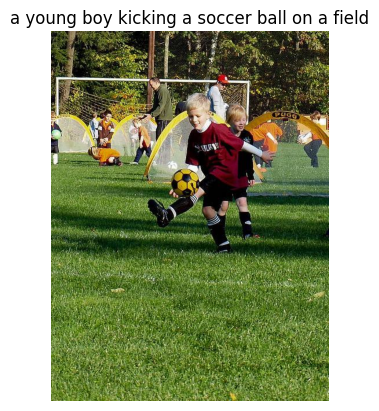

In [ ]:
# Example usage
image_paths = ["/content/COCO_train2014_000000000368.jpg"]
captions = predict_step_and_display(image_paths)


In [ ]:

from transformers import pipeline

image_to_text = pipeline("image-to-text", model="nlpconnect/vit-gpt2-image-captioning")

image_to_text("/content/Screenshot 2024-10-18 165824.png")


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1258: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


[{'generated_text': 'a giraffe eating from a feeder in a zoo '}]

# LLaVa=1.5

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# !pip install -q -U transformers==4.37.4
!pip install -q bitsandbytes==0.41.3 accelerate==0.25.0

In [ ]:
import requests
import os
from PIL import Image
# Đường dẫn tới thư mục chứa các hình ảnh
image_directory = "/content/drive/MyDrive/KLTN/Dataset/emotic_pre/mscoco/images/"

# Lấy danh sách tất cả các đường dẫn tới các ảnh trong thư mục
image_paths = [os.path.join(image_directory, filename) for filename in os.listdir(image_directory) if filename.endswith((".jpg", ".png"))]


In [ ]:
import torch
from transformers import BitsAndBytesConfig

quantization_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_compute_dtype=torch.float16
)

In [ ]:
from transformers import pipeline

model_id = "llava-hf/llava-1.5-7b-hf"

pipe = pipeline("image-to-text", model=model_id, model_kwargs={"quantization_config": quantization_config})

KeyboardInterrupt: 

In [ ]:
# max_new_tokens = 200

# prompt = "USER: <image>\nGiven the following list of emotions: {peace, affection, esteem, anticipation, engagement, confidence, happiness, pleasure, excitement, fatigue, embarrassment, yearning, disapproval, aversion, annoyance, anger, sensitivity, sadness, surprise, sympathy, doubt, disconnection, disquietment, fear, pain, suffering}, Please explain in detail which emotions are more suitable for describing how the person in the blue box feels based on the images context.\nASSISTANT:"

# outputs = pipe(image_url, prompt=prompt, generate_kwargs={"max_new_tokens": 200})

In [ ]:
# print(outputs[0]["generated_text"])

In [ ]:
# Prompt để đưa ra cảm xúc phù hợp
prompt = (
    "USER: <image>\n"
    "Given the following list of emotions: {peace, affection, esteem, anticipation, engagement, confidence, happiness, pleasure, "
    "excitement, fatigue, embarrassment, yearning, disapproval, aversion, annoyance, anger, sensitivity, sadness, surprise, "
    "sympathy, doubt, disconnection, disquietment, fear, pain, suffering}, Please explain in detail which emotions are more "
    "suitable for describing how the person in the blue box feels based on the image context.\nASSISTANT:"
)


In [ ]:
# Danh sách để lưu dữ liệu cho CSV
results = []

# Duyệt qua từng ảnh trong danh sách và tạo caption
for image_path in image_paths:
    try:
        # Mở ảnh
        image = Image.open(image_path)

        # Tạo caption và phân tích cảm xúc từ ảnh
        outputs = pipe(
            images=image,
            prompt=prompt,
            generate_kwargs={"max_new_tokens": 200}
        )

        # Lấy tên tấm ảnh
        image_name = os.path.basename(image_path)

        # Lưu tên ảnh và câu caption vào danh sách
        results.append({"image_name": image_name, "caption": outputs[0]["generated_text"]})

        print(f"Processed {image_name}")

    except Exception as e:
        print(f"Error processing {image_path}: {e}")


In [ ]:
# Chuyển danh sách thành DataFrame và lưu vào CSV
import pandas as pd
df = pd.DataFrame(results)
csv_path = "/content/drive/MyDrive/KLTN/captions_mscoco.csv"
df.to_csv(csv_path, index=False)

print(f"Captions saved to {csv_path}")

# BLIP (Chatgpt)


In [ ]:
!pip install transformers==4.34.0
!pip install timm==0.6.13
!pip install torch torchvision


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.5/121.5 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 99.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 77.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 26.4 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.26.2
    Uninstalling huggingface-hub-0.26.2:
      Successfully uninstalled huggingface-hub-0.26.2
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.20.3
    Uninstalling tokenizers-0.20.3:
      Successfully uninstalled tokenizers-0.20.3
  Attempting uninstall: transformers
    Found existing installation: transformers 4.46.2
    Uninstalling transformers-4.46.2:
      Successfully uninstalled transformers-4.46.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the

In [ ]:
!pip install --upgrade pip setuptools wheel


  Using cached setuptools-75.6.0-py3-none-any.whl.metadata (6.7 kB)
  Using cached wheel-0.45.1-py3-none-any.whl.metadata (2.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 33.0 MB/s eta 0:00:00
Using cached setuptools-75.6.0-py3-none-any.whl (1.2 MB)
Using cached wheel-0.45.1-py3-none-any.whl (72 kB)
  Attempting uninstall: wheel
    Found existing installation: wheel 0.45.0
    Uninstalling wheel-0.45.0:
      Successfully uninstalled wheel-0.45.0
  Attempting uninstall: setuptools
    Found existing installation: setuptools 75.1.0
    Uninstalling setuptools-75.1.0:
      Successfully uninstalled setuptools-75.1.0
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is

In [ ]:
!git clone https://github.com/salesforce/BLIP.git
!pip install -r BLIP/requirements.txt

fatal: destination path 'BLIP' already exists and is not an empty directory.
  Using cached timm-0.4.12-py3-none-any.whl.metadata (30 kB)
  Using cached transformers-4.15.0-py3-none-any.whl.metadata (59 kB)
  Using cached fairscale-0.4.4-py3-none-any.whl
  Using cached pycocoevalcap-1.2-py3-none-any.whl.metadata (3.2 kB)
  Using cached sacremoses-0.1.1-py3-none-any.whl.metadata (8.3 kB)
ERROR: Operation cancelled by user


In [ ]:
!wget https://storage.googleapis.com/sfr-vision-language-research/BLIP/models/model_large_caption.pth -P BLIP/checkpoints


--2024-12-05 15:32:07--  https://storage.googleapis.com/sfr-vision-language-research/BLIP/models/model_large_caption.pth
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.204.207, 64.233.187.207, 64.233.188.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.204.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1785411505 (1.7G) [application/octet-stream]
Saving to: ‘BLIP/checkpoints/model_large_caption.pth’

model_large_caption 100%[===================>]   1.66G  31.3MB/s    in 57s     

2024-12-05 15:33:04 (29.9 MB/s) - ‘BLIP/checkpoints/model_large_caption.pth’ saved [1785411505/1785411505]



In [ ]:
import torch
from torchvision import transforms
from PIL import Image
from BLIP.models.blip import blip_decoder


ModuleNotFoundError: No module named 'models'

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Đường dẫn checkpoint BLIP
model_url = 'BLIP/checkpoints/model_large_caption.pth'
model = blip_decoder(pretrained=model_url, image_size=384, vit='large')
model.eval()
model.to(device)


In [ ]:
# Hàm tiền xử lý hình ảnh
def preprocess_image(image_path):
    transform = transforms.Compose([
        transforms.Resize((384, 384)),
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])
    image = Image.open(image_path).convert('RGB')
    return transform(image).unsqueeze(0).to(device)


In [ ]:
# Hàm sinh caption
def generate_caption(image_path):
    image = preprocess_image(image_path)
    with torch.no_grad():
        caption = model.generate(image, sample=False, num_beams=5, max_length=30, min_length=5)
    return caption[0]

# Đường dẫn tới ảnh
image_path = "/content/your_image.jpg"  # Thay bằng đường dẫn tới ảnh của bạn
caption = generate_caption(image_path)
print("Caption:", caption)


In [ ]:
from google.colab import files
uploaded = files.upload()


In [ ]:
import os

image_folder = "/content/emotic_images"  # Thay bằng thư mục chứa ảnh
captions = {}

for image_file in os.listdir(image_folder):
    image_path = os.path.join(image_folder, image_file)
    captions[image_file] = generate_caption(image_path)

# In caption cho các ảnh
for img, caption in captions.items():
    print(f"{img}: {caption}")


# expansion-v2

In [ ]:
!pip install torch torchvision transformers


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 69.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 38.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 26.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 31.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
import torch
import torchvision.transforms as transforms
from PIL import Image
# from expansionnet import ExpansionNetV2  # Giả sử bạn có module này

# Load mô hình từ file đã lưu
model_path = "/content/drive/MyDrive/KLTN/ExpansionNet_v2/rf_model.pth"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [ ]:
%cd /content/drive/MyDrive/KLTN/ExpansionNet_v2/

/content/drive/MyDrive/KLTN/ExpansionNet_v2


In [ ]:
!python demo.py --load_path /content/drive/MyDrive/KLTN/ExpansionNet_v2/rf_model.pth --image_paths /content/COCO_train2014_000000003348_bbox.jpg


Dictionary loaded ...
/usr/local/lib/python3.11/dist-packages/torch/functional.py:534: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3595.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
/content/drive/MyDrive/KLTN/ExpansionNet_v2/demo.py:70: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted b

In [ ]:
# Giả sử mô hình được lưu dưới dạng ExpansionNetV2
model = ExpansionNetV2()
model.load_state_dict(torch.load(model_path, map_location=device))
model.to(device)
model.eval()


NameError: name 'ExpansionNetV2' is not defined

In [ ]:
# Hàm tiền xử lý ảnh đầu vào
def preprocess_image(image_path):
    transform = transforms.Compose([
        transforms.Resize((384, 384)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
    image = Image.open(image_path).convert("RGB")
    return transform(image).unsqueeze(0).to(device)

In [ ]:
# Hàm sinh caption từ hình ảnh
def generate_caption(image_path):
    image_tensor = preprocess_image(image_path)

    with torch.no_grad():
        caption = model.generate(image_tensor)  # Tùy vào cách triển khai model, có thể khác
    return caption

# Chạy thử với một hình ảnh
image_path = "test_image.jpg"  # Đổi thành đường dẫn ảnh của bạn
caption = generate_caption(image_path)
print("Generated Caption:", caption)
